# Data analysis for Pipe 3D, Integral Field Spectroscopy

For further information related to the dataset please go to the project [README](https://github.com/nestornav/astroestadistica_2022)

In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.io import fits

## 1. Importing the data

The orginal files have at the first N rows the name of the columns per row. So I decide to remove them for all the csv files and create a custom column list per table. On the other hand I assigned suffix for the errors to avoid mix them even after the merging all the tables.


### Context information
* Table 8: contains data related to the integrated properties of the califa dr2 galaxies.
* Table 9: contains data related to the average proporties of the califa dr2 galacies.
* Table 10: contains data related to the califa dr2 galaxies at the effective radius.

After the data importing, I will check the integrity of the data and take actions if it is needed.

Due to there are several same names into the columns I'll add a sufix at the end of the repeated columns. For references:
- ip = integrated properties (table 8).
- avg = average properties (table 9).
- er = efective radius (table 10).

Finally SSPS stands for Sky Survey Prototype System

In [2]:
cols_tab_8 = ['califa_name', 'id', 'ra_J2000', 'dec_J200', 'redshift', 'log(Mass/Msun)_ip',
               'error_mm_ip', 'log(SFR/Msun/yr)_ip', 'error_sfr']

cols_tab_9 = ['califa_name', 'log(age/yr)_ssp_avg', 'error_ay_avg','[Z/H]_ssp_avg', 'error_zh_avg',
              'av_ssp_avg', 'error_avg', '12+log(O/H)_O3N2_avg', 'error_oh_avg', 'av_gas_mag_avg', 'error_mag_avg']

cols_tab_10 = ['califa_name', 'log(age/yr)_ssp_er', 'error_ay_er','[Z/H]_ssp_er', 'error_zh_er',
              'av_ssp_er', 'error_spp', '12+log(O/H)_O3N2_er', 'error_oh_er',
              'av_gas(mag)_er', 'error_mag']

In [3]:
table8_path = '../data/pipe3d/DR2_Pipe3D_obj.tab.csv'
table9_path = '../data/pipe3d/DR2_Pipe3D_mean.tab.csv'
table10_path = '../data/pipe3d/DR2_Pipe3D_Re.tab.csv'

df_tab_8 = pd.read_csv(table8_path, names=cols_tab_8, delimiter=',')
df_tab_9 = pd.read_csv(table9_path, names=cols_tab_9, delimiter=';')
df_tab_10 = pd.read_csv(table10_path, names=cols_tab_10, delimiter=';')

In [4]:
print(f'Shape of Table 8, integrated properties of galaxies: {df_tab_8.shape}')
print(f'Shape of Table 9, average properties of galaxies: {df_tab_9.shape}')
print(f'Shape of Table 10, properties of galaxies at the effective radius: {df_tab_10.shape}')

Shape of Table 8, integrated properties of galaxies: (200, 9)
Shape of Table 9, average properties of galaxies: (200, 11)
Shape of Table 10, properties of galaxies at the effective radius: (200, 11)


In [5]:
df_tab_8.head()

,califa_name,id,ra_J2000,dec_J200,redshift,log(Mass/Msun)_ip,error_mm_ip,log(SFR/Msun/yr)_ip,error_sfr
0,IC;5376;,001,00;:01:19.77,+34:31:32.52,0.0166,10.65,0.10,0.006,0.105
1,UG;C000;05,002,;00:03:05.63,-01:54:49.67,0.0240,11.16,0.08,0.867,0.066
2,NG;C781;9,003,0;0:04:24.50,+31:28:19.20,0.0165,10.61,0.08,0.412,0.067
3,IC;1528;,005,00;:05:05.37,-07:05:36.23,0.0125,10.54,0.11,0.197,0.064
4,UG;C000;36,007,;00:05:13.87,+06:46:19.20,0.0208,11.06,0.09,0.186,0.134


In [6]:
df_tab_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   califa_name          200 non-null    object 
 1   id                   200 non-null    object 
 2   ra_J2000             200 non-null    object 
 3   dec_J200             200 non-null    object 
 4   redshift             200 non-null    float64
 5   log(Mass/Msun)_ip    200 non-null    float64
 6   error_mm_ip          200 non-null    float64
 7   log(SFR/Msun/yr)_ip  200 non-null    float64
 8   error_sfr            200 non-null    float64
dtypes: float64(5), object(4)
memory usage: 14.2+ KB


In [7]:
df_tab_9.head()

,califa_name,log(age/yr)_ssp_avg,error_ay_avg,[Z/H]_ssp_avg,error_zh_avg,av_ssp_avg,error_avg,12+log(O/H)_O3N2_avg,error_oh_avg,av_gas_mag_avg,error_mag_avg
0,IC5376,8.99,0.51,-0.35,0.16,0.57,1.17,8.50,0.05,1.24,0.03
1,UGC00005,8.97,0.42,-0.31,0.13,0.26,0.83,8.54,0.06,1.30,0.04
2,NGC7819,8.68,0.45,-0.29,0.11,0.10,0.62,8.47,0.07,0.90,0.08
3,IC1528,8.75,0.54,-0.34,0.14,0.22,0.82,8.47,0.08,0.77,0.03
4,UGC00036,9.42,0.26,-0.17,0.12,0.10,0.69,8.52,0.06,1.33,0.09


In [8]:
df_tab_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   califa_name           200 non-null    object 
 1   log(age/yr)_ssp_avg   200 non-null    float64
 2   error_ay_avg          200 non-null    float64
 3   [Z/H]_ssp_avg         200 non-null    float64
 4   error_zh_avg          200 non-null    float64
 5   av_ssp_avg            200 non-null    float64
 6   error_avg             200 non-null    float64
 7   12+log(O/H)_O3N2_avg  168 non-null    float64
 8   error_oh_avg          168 non-null    float64
 9   av_gas_mag_avg        186 non-null    float64
 10  error_mag_avg         186 non-null    float64
dtypes: float64(10), object(1)
memory usage: 17.3+ KB


In [9]:
df_tab_10.head()

,califa_name,log(age/yr)_ssp_er,error_ay_er,[Z/H]_ssp_er,error_zh_er,av_ssp_er,error_spp,12+log(O/H)_O3N2_er,error_oh_er,av_gas(mag)_er,error_mag
0,IC5376,9.37,0.50,-0.44,0.13,0.48,0.11,8.53,0.04,1.34,0.21
1,UGC00005,9.18,0.28,-0.37,0.11,0.29,0.09,8.57,0.04,1.28,0.18
2,NGC7819,8.81,0.44,-0.28,0.14,0.06,0.06,8.47,0.07,0.82,0.17
3,IC1528,9.03,0.31,-0.41,0.14,0.19,0.10,8.51,0.04,0.77,0.14
4,UGC00036,9.56,0.44,-0.24,0.15,0.10,0.06,8.53,0.05,1.22,0.25


In [10]:
df_tab_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   califa_name          200 non-null    object 
 1   log(age/yr)_ssp_er   200 non-null    float64
 2   error_ay_er          200 non-null    float64
 3   [Z/H]_ssp_er         200 non-null    float64
 4   error_zh_er          200 non-null    float64
 5   av_ssp_er            200 non-null    object 
 6   error_spp            200 non-null    float64
 7   12+log(O/H)_O3N2_er  156 non-null    float64
 8   error_oh_er          156 non-null    float64
 9   av_gas(mag)_er       162 non-null    float64
 10  error_mag            162 non-null    float64
dtypes: float64(9), object(2)
memory usage: 17.3+ KB


For all the imports I needed to set up the delimiter parameter to a right import. After  check the data I realized that table 8 (integrated proporties) has several in the data. In that case, the solution was change the delimiter.

On the other hand table 8 has errors in columns such as califa_name and RA_J2000. So I need to perform some actions to get a good data quality. Finally the left table were imported right and didn't show errors in the values.

Tables 9 and 10 have several null values for some features. This situation will be tackle in the data preparation step.

## 2. Data preparation

The main idea of this step is provide a dataset to start working on the assgiment.

### 2.1 Clean up dirty column values

In [5]:
rule = r'[^\w\s]'
df_tab_8['califa_name'] = df_tab_8['califa_name'].apply(lambda x: re.sub(rule,'',x))
df_tab_8['ra_J2000'] = df_tab_8['ra_J2000'].apply(lambda x: x.replace(';', ''))

In [12]:
df_tab_8.head()

,califa_name,id,ra_J2000,dec_J200,redshift,log(Mass/Msun)_ip,error_mm_ip,log(SFR/Msun/yr)_ip,error_sfr
0,IC5376,001,00:01:19.77,+34:31:32.52,0.0166,10.65,0.10,0.006,0.105
1,UGC00005,002,00:03:05.63,-01:54:49.67,0.0240,11.16,0.08,0.867,0.066
2,NGC7819,003,00:04:24.50,+31:28:19.20,0.0165,10.61,0.08,0.412,0.067
3,IC1528,005,00:05:05.37,-07:05:36.23,0.0125,10.54,0.11,0.197,0.064
4,UGC00036,007,00:05:13.87,+06:46:19.20,0.0208,11.06,0.09,0.186,0.134


In [13]:
df_tab_9.isna().sum() / len(df_tab_9)

califa_name             0.00
log(age/yr)_ssp_avg     0.00
error_ay_avg            0.00
[Z/H]_ssp_avg           0.00
error_zh_avg            0.00
av_ssp_avg              0.00
error_avg               0.00
12+log(O/H)_O3N2_avg    0.16
error_oh_avg            0.16
av_gas_mag_avg          0.07
error_mag_avg           0.07
dtype: float64

In [14]:
df_tab_9.shape

(200, 11)

In [15]:
df_tab_10.isna().sum() / len(df_tab_10)

califa_name            0.00
log(age/yr)_ssp_er     0.00
error_ay_er            0.00
[Z/H]_ssp_er           0.00
error_zh_er            0.00
av_ssp_er              0.00
error_spp              0.00
12+log(O/H)_O3N2_er    0.22
error_oh_er            0.22
av_gas(mag)_er         0.19
error_mag              0.19
dtype: float64

### 2.1 Merging the DFs

In [6]:
df = df_tab_8.merge(df_tab_9, on='califa_name', how='left').merge(df_tab_10, on='califa_name', how='left')

In [17]:
df.head()

,califa_name,id,ra_J2000,dec_J200,redshift,log(Mass/Msun)_ip,error_mm_ip,log(SFR/Msun/yr)_ip,error_sfr,log(age/yr)_ssp_avg,...,log(age/yr)_ssp_er,error_ay_er,[Z/H]_ssp_er,error_zh_er,av_ssp_er,error_spp,12+log(O/H)_O3N2_er,error_oh_er,av_gas(mag)_er,error_mag
0,IC5376,001,00:01:19.77,+34:31:32.52,0.0166,10.65,0.10,0.006,0.105,8.99,...,9.37,0.50,-0.44,0.13,0.48,0.11,8.53,0.04,1.34,0.21
1,UGC00005,002,00:03:05.63,-01:54:49.67,0.0240,11.16,0.08,0.867,0.066,8.97,...,9.18,0.28,-0.37,0.11,0.29,0.09,8.57,0.04,1.28,0.18
2,NGC7819,003,00:04:24.50,+31:28:19.20,0.0165,10.61,0.08,0.412,0.067,8.68,...,8.81,0.44,-0.28,0.14,0.06,0.06,8.47,0.07,0.82,0.17
3,IC1528,005,00:05:05.37,-07:05:36.23,0.0125,10.54,0.11,0.197,0.064,8.75,...,9.03,0.31,-0.41,0.14,0.19,0.10,8.51,0.04,0.77,0.14
4,UGC00036,007,00:05:13.87,+06:46:19.20,0.0208,11.06,0.09,0.186,0.134,9.42,...,9.56,0.44,-0.24,0.15,0.10,0.06,8.53,0.05,1.22,0.25


## 3. Save the dataset

In [3]:
path = '../data/pipe_full_dataset.csv'

In [11]:
# save the merged dataset to a given path
# df is the merged dataframe in the 2.1 section
df.to_csv(path)

In [4]:
# load an already pre-worked dataset
df = pd.read_csv(path)

## 4. Data Analysis

### 4.1 Show distribution of the features 

<AxesSubplot:xlabel='redshift', ylabel='Count'>

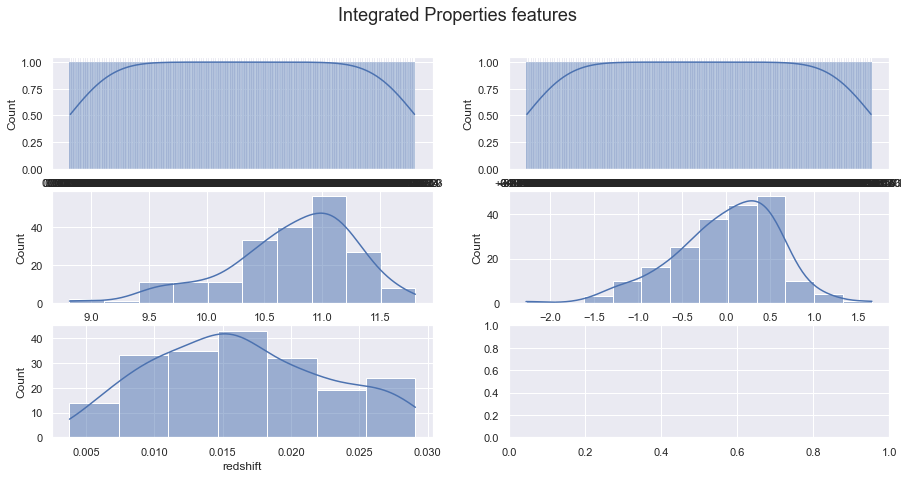

In [5]:
sns.set()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))
fig.suptitle('Integrated Properties features', fontsize=18)

sns.histplot(data=df, x='ra_J2000', kde=True, ax=axs[0,0], bins='scott')#lat and long into sphere
sns.histplot(data=df, x='dec_J200', kde=True, ax=axs[0,1], bins='scott')
sns.histplot(data=df, x='log(Mass/Msun)_ip', kde=True, ax=axs[1,0], bins='scott') #galaxy mass related to sun mass
sns.histplot(data=df, x='log(SFR/Msun/yr)_ip', kde=True, ax=axs[1,1], bins='scott')
sns.histplot(data=df, x='redshift', kde=True, ax=axs[2,0], bins='scott')

<AxesSubplot:xlabel='av_gas_mag_avg', ylabel='Count'>

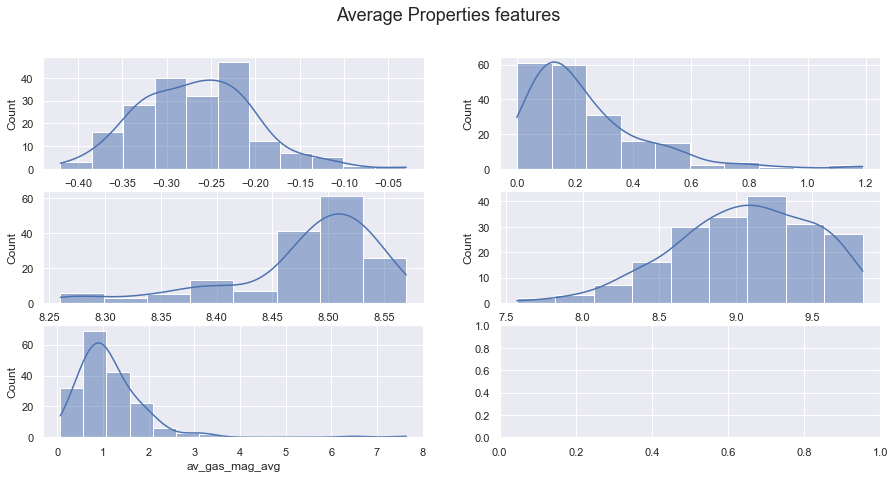

In [6]:
sns.set()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))
fig.suptitle('Average Properties features', fontsize=18)

sns.histplot(data=df, x='[Z/H]_ssp_avg', kde=True, ax=axs[0,0], bins='scott')
sns.histplot(data=df, x='av_ssp_avg', kde=True, ax=axs[0,1], bins='scott')
sns.histplot(data=df, x='12+log(O/H)_O3N2_avg', kde=True, ax=axs[1,0], bins='scott')
sns.histplot(data=df, x='log(age/yr)_ssp_avg', kde=True, ax=axs[1,1], bins='scott')
sns.histplot(data=df, x='av_gas_mag_avg', kde=True, ax=axs[2,0], bins='scott')

<AxesSubplot:xlabel='av_ssp_er', ylabel='Count'>

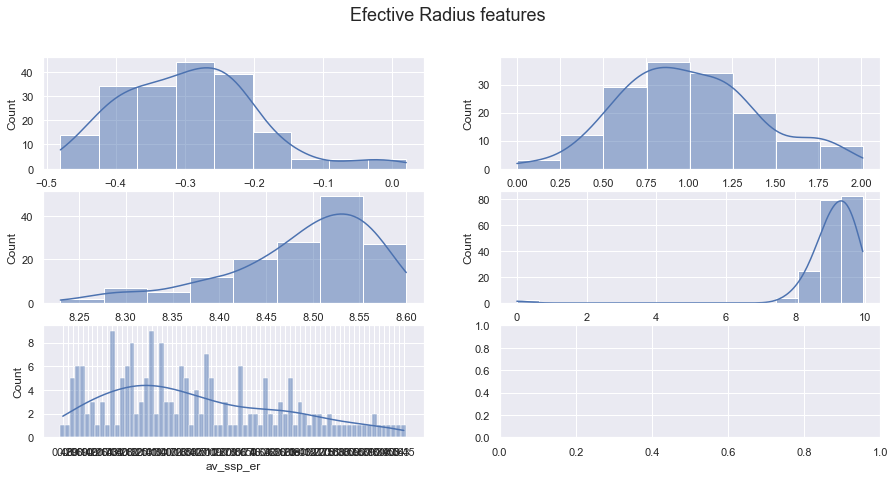

In [7]:
sns.set()
fig, axs_ = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))
fig.suptitle('Efective Radius features', fontsize=18)

sns.histplot(data=df, x='[Z/H]_ssp_er', kde=True, ax=axs_[0,0], bins='scott')
sns.histplot(data=df, x='av_gas(mag)_er', kde=True, ax=axs_[0,1], bins='scott')
sns.histplot(data=df, x='12+log(O/H)_O3N2_er', kde=True, ax=axs_[1,0], bins='scott')
sns.histplot(data=df, x='log(age/yr)_ssp_er', kde=True, ax=axs_[1,1], bins='scott')
sns.histplot(data=df, x='av_ssp_er', kde=True, ax=axs_[2,0], bins='scott')

#lbs =axs_[2,0].get_xticklabels()

#axs[2,0].set_xticklabels(lbs, rotation = 30)
#[textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()]
#axs[2,0].set_xticklabel( labelrotation = 30)
#ax1.set(rotation=90)


### 4.2 Relation between features

Try to understand the relation between different features of the galaxies.

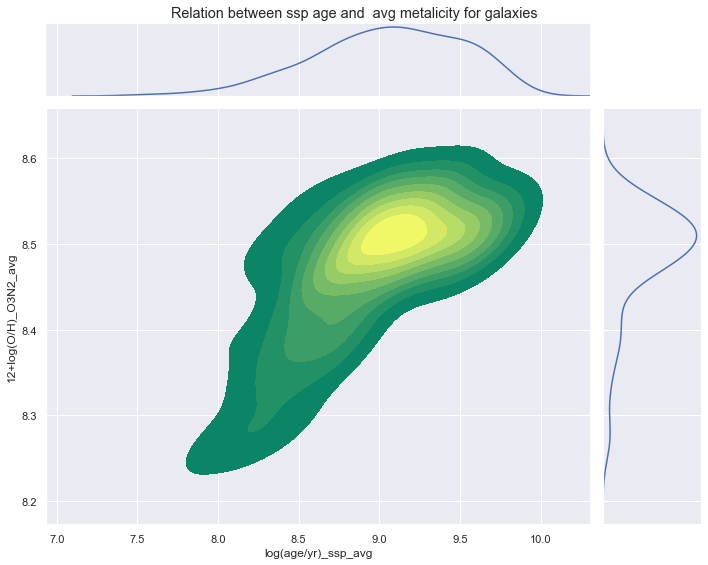

In [75]:
grid = sns.jointplot(data=df, x='log(age/yr)_ssp_avg', y='12+log(O/H)_O3N2_avg',
              cmap='summer', shade=True, kind='kde')

grid.fig.set_figwidth(10)
grid.fig.set_figheight(8)
grid.fig.suptitle("Relation between ssp age and  avg metalicity for galaxies")
grid.fig.tight_layout()
grid.fig.subplots_adjust(top=0.95)

The average metalicity of the galaxy is higher in the middle of the plot.

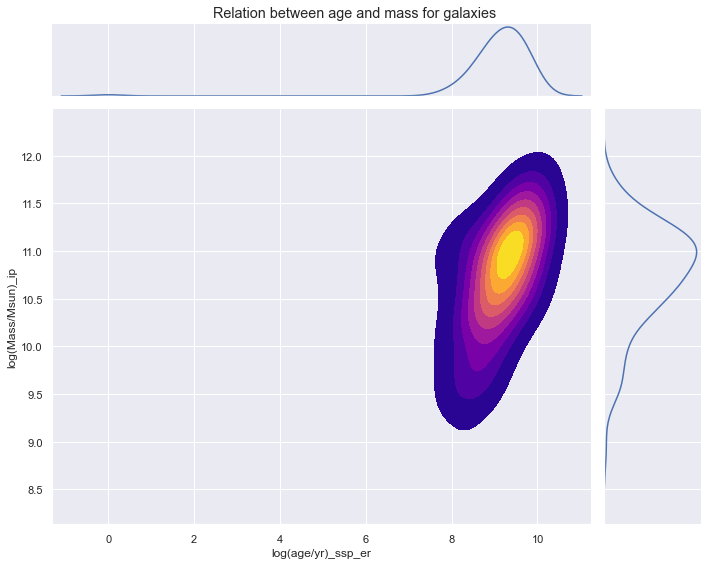

In [73]:
grid = sns.jointplot(data=df, x='log(age/yr)_ssp_er', y='log(Mass/Msun)_ip',
              cmap='plasma', shade=True, kind='kde')

grid.fig.set_figwidth(10)
grid.fig.set_figheight(8)
grid.fig.suptitle("Relation between age and mass for galaxies")
grid.fig.tight_layout()
grid.fig.subplots_adjust(top=0.95)

The solar mass of a galixy is higher when it's older.

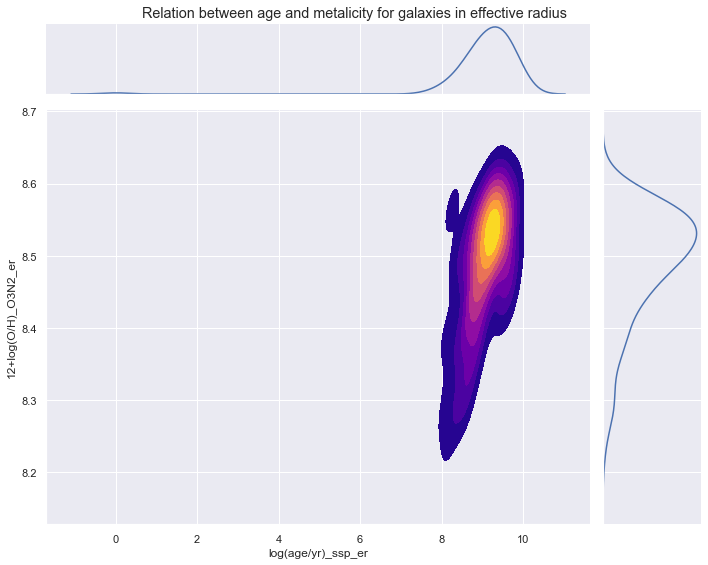

In [71]:
grid = sns.jointplot(x=df['log(age/yr)_ssp_er'], y=df['12+log(O/H)_O3N2_er'],
              cmap='plasma', shade=True, kind='kde')

grid.fig.set_figwidth(10)
grid.fig.set_figheight(8)

grid.fig.suptitle("Relation between age and metalicity for galaxies in effective radius")
grid.fig.tight_layout()
grid.fig.subplots_adjust(top=0.95)

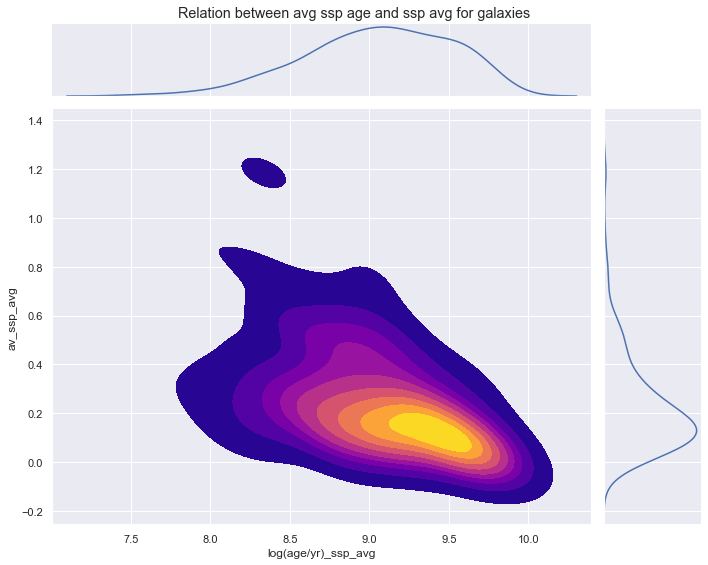

In [74]:
grid = sns.jointplot(data=df, x='log(age/yr)_ssp_avg', y='av_ssp_avg',
              cmap='plasma', shade=True, kind='kde')

grid.fig.set_figwidth(10)
grid.fig.set_figheight(8)
grid.fig.suptitle("Relation between avg ssp age and ssp avg for galaxies")
grid.fig.tight_layout()
grid.fig.subplots_adjust(top=0.95)


All the graphics show one galaxy. But in the last two, appear a small comulus. It's more evident at the top of the last chart. These cumukys could be noice (outlier values) or maybe an small young galaxy.

## 5 Clustering